## Mathematical Tools

In [1]:
import numpy as np
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [4]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

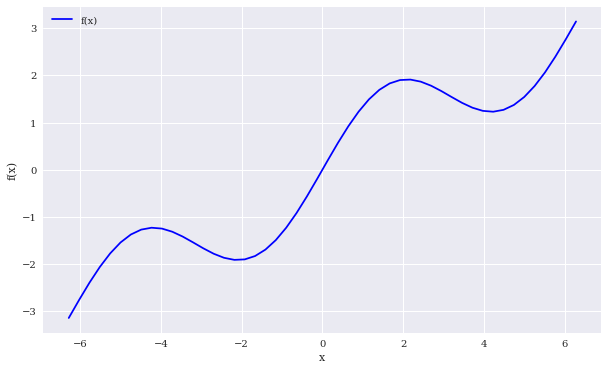

In [5]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])


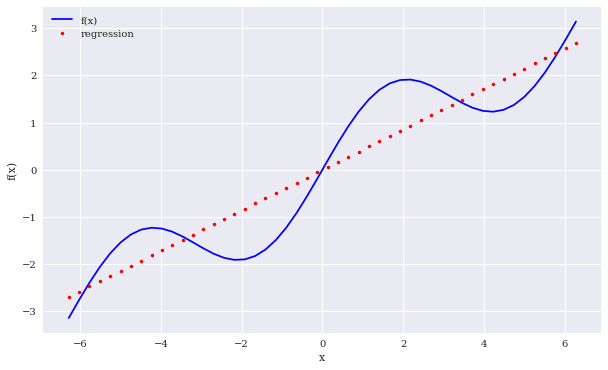

In [6]:
res = np.polyfit(x, f(x), deg=1, full=True)
ry = np.polyval(res[0], x)
create_plot([x, x], [f(x), ry], ['b', 'r.'],
 ['f(x)', 'regression'], ['x', 'f(x)'])

In [7]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)


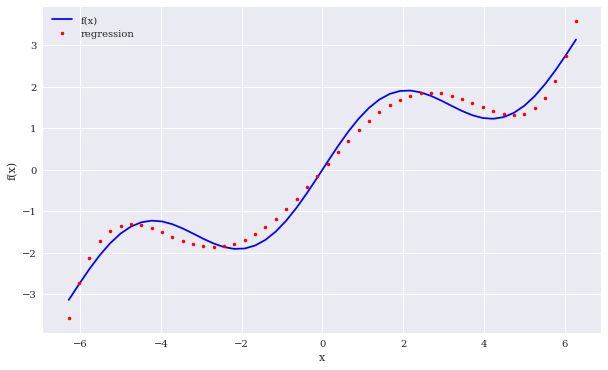

In [8]:
 create_plot([x, x], [f(x), ry], ['b', 'r.'],
 ['f(x)', 'regression'], ['x', 'f(x)'])

## Interpolation

In [9]:
import scipy.interpolate as spi
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)
def f(x):return np.sin(x) + 0.5 * x

In [10]:
ipo = spi.splrep(x, f(x), k=1)

In [11]:
iy = spi.splev(x, ipo)

In [12]:
np.allclose(f(x), iy)

True

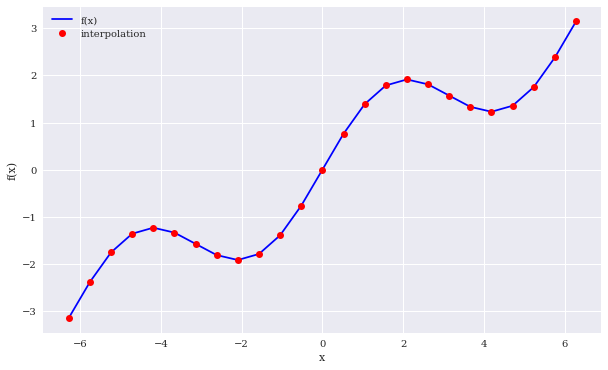

In [13]:
create_plot([x, x], [f(x), iy], ['b', 'ro'],
 ['f(x)', 'interpolation'], ['x', 'f(x)'])


In [14]:
xd = np.linspace(1.0, 3.0, 50) 
iyd = spi.splev(xd, ipo)

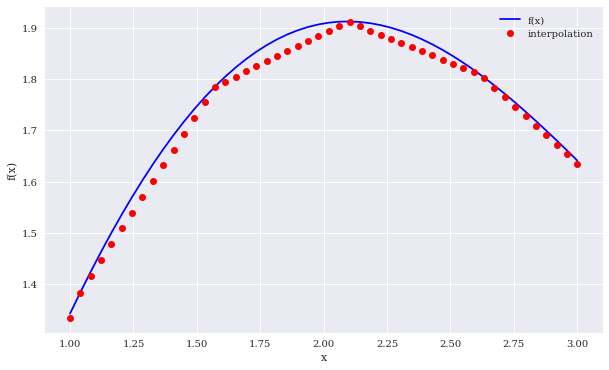

In [15]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
 ['f(x)', 'interpolation'], ['x', 'f(x)'])


In [16]:
ipo = spi.splrep(x, f(x), k=3) 
iyd = spi.splev(xd, ipo)

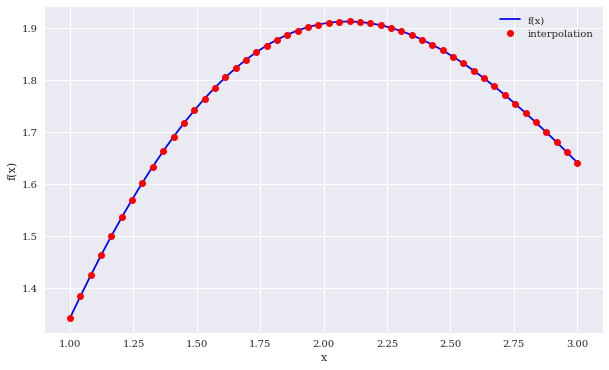

In [17]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
 ['f(x)', 'interpolation'], ['x', 'f(x)'])


## Convex Optimization

In [18]:
def fm(p):
    x,y = p
    return (np.sin(x) + 0.05* y **2 
           + np.sin(y)+ 0.05*y*2)


In [19]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))


C:\Users\NEXT\AppData\Local\Temp\ipykernel_13476\247289064.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


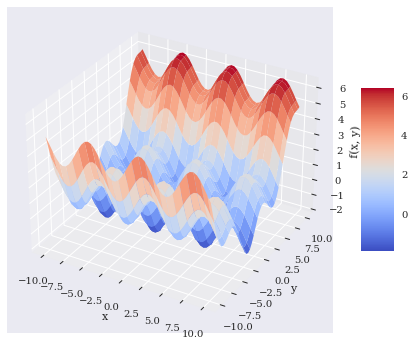

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
cmap='coolwarm', linewidth=0.5,
antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

## Gllobal Optimization

In [23]:
import scipy.optimize as sco 

In [24]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
         print('%8.4f | %8.4f | %8.4f' % (x, y, z)) 
    return z

In [25]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [27]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [28]:
fm(opt1)


-2.0128994599769205

# Local Optimization

Constrined Optimization

Integration

In [30]:
import scipy.integrate as sc

In [31]:
def f(x):return np.sin(x) + 0.5 * x

In [34]:
x = np.linspace(0, 10)
y = f(x)
a = 0.5 
b = 9.5 
Ix = np.linspace(a, b) 
Iy = f(Ix) 

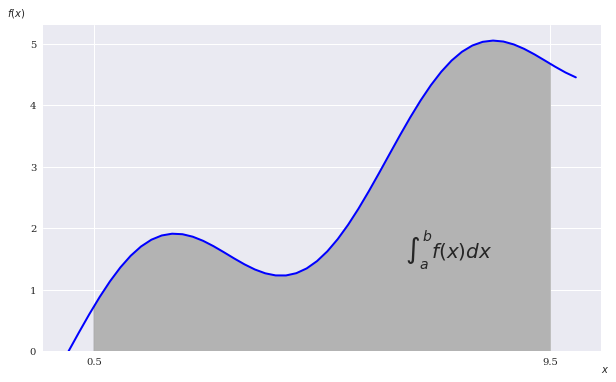

In [35]:
 from matplotlib.patches import Polygon
 In [84]: fig, ax = plt.subplots(figsize=(10, 6))
 plt.plot(x, y, 'b', linewidth=2)
 plt.ylim(bottom=0)
 Ix = np.linspace(a, b)
 Iy = f(Ix)
 verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
 poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
 ax.add_patch(poly)
 plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
 horizontalalignment='center', fontsize=20)
 plt.figtext(0.9, 0.075, '$x$')
 plt.figtext(0.075, 0.9, '$f(x)$')
 ax.set_xticks((a, b))